# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Richard|secret|
|Thomas|secret|
|Jesse|secret|
|Agaath|secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Linked Data project

Maak een notebook met een end-to-end project gebaseerd op wikidata, en neem bijvoorbeeld deze als inspiratie:
* Mooie tutorial van begin tot eind met goede video: <https://media.ed.ac.uk/media/Wikidata+Sparql+Query+Tutorial/1_7v9v6s04> (Vrouwen educated in university of edinburg)
* Leuke tutorial met notebooks beschikbaar: <https://towardsdatascience.com/where-do-mayors-come-from-querying-wikidata-with-python-and-sparql-91f3c0af22e2>
* [Deze pagina](https://www.wikidata.org/wiki/Wikidata:WikiProject_every_politician/Netherlands/data/House/All_Members) over Nederlandse politici bevat een mooi begin, waar je nog heel wat moois van kan maken. 
* Of [deze](https://www.wikidata.org/wiki/Wikidata:WikiProject_Netherlands_Public_Libraries/Branches/By_Organisation) over bibliotheken. Ook hier kan je zowel het spreadsheet veel rijker maken, als natuurlijk op basis daarvan een geweldige interface maken.
    * Maar er is al een hoop mee gedaan hoor: zie bijvoorbeeld <https://www.wikidata.org/wiki/Wikidata:WikiProject_Netherlands_Public_Libraries/Maps#Country>
* <https://www.wikidata.org/wiki/Wikidata:WikiProject_COVID-19>


## Vereisten

1. Leuk probleem, goed uitgewerkt en gemotiveerd. Origineel, maar kan natuurlijk gebaseerd zijn op eerder werk.
    * Wees heel eerlijk met je inspiratiebronnen, en noem ze, en benoem exact waar jij verder bent gegaan (wat zijn jullie toevoegingen?)
2. Het moet gaan over **Nederlandse** data, of data over Nederland. 
    * Natuurlijk mag er ook een verband met het buitenland zijn.
2. Een dataset die je met SPARQL uit wikidata haalt, en die je netjes beschrijft, en aangeeft dat de data "klopt" met jouw probleem.
    * je dataset moet wel echt wat body hebben: dus flink wat rijen (items), en kolommen (eigenschappen)
    * je kan je data in spreadsheet formaat of SQL formaat of zelfs JSON formaat opslaan, en er dan later mee verder werken in Python-Pandas, SQL, of direct met python dicts.
3. Je laat nu op een aansprekende manier zien hoe jouw data jouw probleem oplost.
    * Dit kan prima in een jupyter notebook. Het is een **functioneel prototype** voor een mogelijke webapplicatie. 
    * Je kan [python widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html) gebruiken voor interactie met gebruiker
    * of plotly en dash voor gave interactieve plots en visuals (of seaborn als je het saai statisch wilt houden)
4. Schrijf een reflectie.
5. Jouw hele "blogpost/tutorial" is een Jupyter notebook die standalone perfect draait. (mits verbonden met het web).
6. Je plaatst je notebook op een publiek github adres, of ergens op Google colab. Met gedraaide output. Het is belangrijk dat anderen jouw notebook 
    * heel makkelijk kunen lezen
    * heel makkelijk kunnen downloaden, en runnen.
        * dus als je niet standaard modules gebruikt zet je in een aparte uitgecommentarieerde cel de `pip install commands`
7. En levert hem natuurlijk ook weer in via Canvas.

### Grading

* Ook hier weer via peer review binnen je groep.
* Plus een expert review van je tutor.
* Maak er wat moois, leerzaams, gaafs, en verrassends van! 

In [2]:
# Pip install commands van de gebruikte modules.
# !pip install matplotlib
# !pip install numpy
# !pip install pandas

In [3]:
from IPython.display import HTML
import ipywidgets as widgets
import requests
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

### Download het notebook alsjeblieft en run hem dan lokaal voor de full experience! Wil je de notebook op Google Colab bekijken, klik dan [hier](https://colab.research.google.com/drive/16EwFs1xHO0wy0qqrLigRl9lFdlLuKeyD?usp=sharing).

# Bedrijven in de AEX

## Table of Contents

* [**1. De AEX**](#Deel_1)
    * [1.1 Wat is de AEX](#1_1_AEX)
    * [1.2 Het AEX probleem](#1_2_probleem)
* [**2. De dataset**](#Deel_2_De_dataset)
    * [2.1 SPARQL query](#2_1_SPARQL)
    * [2.2 Overzicht van de 25 bedrijven in de AEX](#2_2_Overzicht)
* [**3. Oprichtingsjaren van bedrijven in de AEX**](#3_Oprichtingsdatum)
* [**4. Omzet van bedrijven over de jaren**](#4_Omzet)
* [**5. Hoeveelheid volgers op sociale media**](#5_Sociale_Media)
* [**6. Reflectie**](#6_Reflectie)

### ***Hier is een knop om de cellen met code zichtbaar of niet zichbaar te maken:***

In [4]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" 
value="Klik hier om de code aan/uit te zetten"></form>''')

## 1. De AEX <a class="anchor" id="Deel_1"></a>

### 1.1 Wat is de AEX <a class="anchor" id="1_1_AEX"></a>
De AEX staat voor Amsterdam Exchange Index. Soms wordt het ook wel de NYSE Euronext Amsterdam genoemd. De AEX is een index waarin 25 bedrijven zitten. Deze 25 bedrijven zijn de meest verhandelde beursgenoteerde bedrijven van Nederland. De koers van de AEX-index is een belangrijke graadmeter voor hoe goed het gaat met de grootste Nederlandse bedrijven.

De meeste aandelen en obligaties worden tegenwoordig online of via de bank gekocht, maar de echte Amsterdamse effectenbeurs bestaat nog steeds. Het gebouw van het Nederlandse financiële hart bevindt zich op *Beursplein 5 in Amsterdam.*

<img src="https://i.ibb.co/Z8rJxdc/beursplein-5.jpg">

### 1.2 Het AEX probleem <a class="anchor" id="1_2_probleem"></a>
Met onze applicatie willen we in het kort een goed beeld geven van bedrijven die staan genoteerd in de AEX-index. Vooral door gebruik te maken van (interactieve) visualisatie willen we het makkelijk maken voor gebruikers van onze applicatie om de bedrijven te ontdekken. Om een goed beeld te krijgen van de bedrijven lossen we meerdere "sub problemen" op. 

Door ons eerste sub probleem op te lossen krijgt de gebruiker een goed beeld van wanneer welk bedrijf is opgericht. Dit wordt gedaan door de bedrijven te plotten op een tijdlijn, waardoor het makkelijk wordt om in één oog opslag te zien wanneer welke bedrijf is opgericht. Hierdoor wordt kan de oprichtingsdata van verschillende bedrijven met elkaar te vergeleken worden. 

Het tweede sub probleem dat we oplossen is het vergelijken van de omzet van de bedrijven. Dit is namelijk erg lastig te vergelijken zonder daar een visualisatie bij te hebben. Dit proberen we op te lossen door de inkomsten per jaar van bedrijven te plotten in een lijngrafiek.

Het derde en laatste subprobleem heeft te maken met volgers op sociale media . Tegenwoordig spelen sociale media een steeds grotere rol in de marketing van bedrijven. Het leek ons interessant om te kijken hoeveel volgers de bedrijven hebben op sociale media. Dit is geplot in een horizontale staafdiagram.

## 2. De dataset <a class="anchor" id="Deel_2_De_dataset"></a>
Onze dataset halen we door gebruik te maken van een SPARQL query uit wikidata. Waarna we de query data zetten in een JSON file, waardoor het opgeslagen kan worden in een Pandas Dataframe. Hiervoor is gekozen, omdat Pandas een dataframe bieden om makkelijk data uit te halen voor verschillende plots. De dataset bevat data over alle bedrijven die staan genoteerd in de AEX-index. 

Op de rijen van de onze dataset staan de op de AEX genoteerde bedrijven. De kolommen van onze dataset bestaan uit oprichtingsdatum van het bedrijf en het aantal volgers. De querie voor de totale omzet is te vinden onder ['omzet van bedrijven over de jaren'](#4_Omzet).

### 2.1 SPARQL query <a class="anchor" id="2_1_SPARQL"></a>

***(De querie zie je alleen wanneer de code cellen op 'zichtbaar' staan.)***

In [5]:
# Querie van alle bedrijven in de AEX + oprichtingsdatum + social media volgers 
# De querie voor de totale omzet, wordt bij de omzet plot gedaan

url = 'https://query.wikidata.org/sparql'
query = """
SELECT DISTINCT ?bedrijfLabel ?oprichting ?volgers

WHERE {
  
  wd:Q291539 wdt:P527 ?bedrijf.
  ?bedrijf wdt:P571 ?oprichting.
  OPTIONAL{?bedrijf wdt:P8687 ?volgers.}

    SERVICE wikibase:label {   
    bd:serviceParam wikibase:language "en".
    }
}
"""
# Maakt een JSON van de SPARQL query, zodat het in pandas gebruikt kan worden
r = requests.get(url, params = {'format': 'json', 'query': query})
data = r.json()

# Van JSON naar Pandas dataframe
bedrijven = []
for item in data['results']['bindings']:
    bedrijven.append(OrderedDict({
        'bedrijf': item['bedrijfLabel']['value'],
        'oprichtingsdatum': item['oprichting']['value'],
        'volgers': item['volgers']['value']
            if 'volgers' in item else None,
    }))
bedrijven_df = pd.DataFrame(bedrijven)
bedrijven_df['volgers'] = pd.to_numeric(bedrijven_df['volgers'])
#bedrijven_df # Uncomment om de volledige dataframe te zien

### 2.2 Overzicht van de 25 bedrijven in de AEX <a class="anchor" id="2_2_Overzicht"></a>

Niet alle bedrijven in de AEX hebben een plaatje van hun logo beschikbaar gemaakt op wikidata. Daarom hier een plaatje van alle logo's bij elkaar.

<img src="https://i.ibb.co/t2DQxGH/logos-AEX.jpg">

In [6]:
# Overzicht van de 25 bedrijven in de AEX
print('Dit zijn de 25 bedrijven in de AEX!')
overzicht = bedrijven_df['bedrijf'].drop_duplicates().reset_index(drop=True)
overzicht.index = np.arange(1, len(overzicht) + 1)
display(overzicht)

Dit zijn de 25 bedrijven in de AEX!


1                           DSM
2             Royal Dutch Shell
3                 ArcelorMittal
4                    RELX Group
5                Wolters Kluwer
6                      Unilever
7                Ahold Delhaize
8                      Heineken
9                     AkzoNobel
10               ABN AMRO Group
11                          KPN
12                Randstad N.V.
13                        Vopak
14       Koninklijke Philips NV
15                 Galápagos NV
16                      Gemalto
17                ASR Nederland
18    Unibail Rodamco Westfield
19                   Aegon N.V.
20                     NN Group
21                 ASML Holding
22          Aalberts Industries
23                        Adyen
24                       Altice
25                    ING Group
Name: bedrijf, dtype: object

## 3. Oprichtingsjaren van bedrijven in de AEX <a class="anchor" id="3_Oprichtingsdatum"></a>

Sommige bedrijven die in de AEX-index zitten, zitten al tientallen jaren in de AEX. Andere bedrijven pas enkele jaren. De oprichtingsjaren van de bedrijven verschillen ook enorm. Om een duidelijk overzicht te krijgen van wanneer de bedrijven zijn opgericht, is een tijdlijn geplot met daarop alle bedrijven in de AEX en hun oprichtingsjaar.

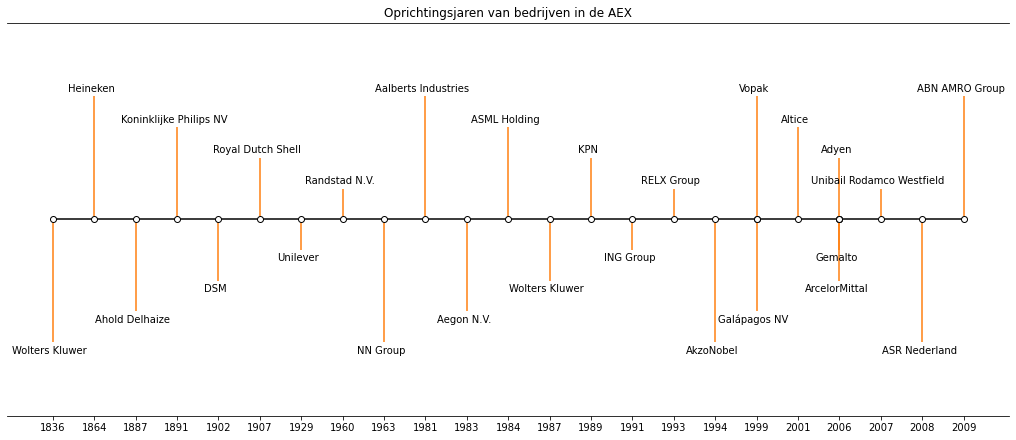

In [7]:
# Plot van wanneer de bedrijven zijn opgericht op een tijdlijn

opgericht_df = bedrijven_df[['bedrijf','oprichtingsdatum']].drop_duplicates()    
opgericht_df.sort_values(by=['oprichtingsdatum'], inplace=True)
datums = [datum[:4] for datum in opgericht_df['oprichtingsdatum']]
opgericht_df['oprichtingsdatum'] = datums

# De hoogte van de lijnen
levels = np.tile([-8, 8, -6, 6, -4, 4, -2, 2],
                 int(np.ceil(len(opgericht_df['oprichtingsdatum'])/8)))[:len(opgericht_df['oprichtingsdatum'])]

# Creër de figuur en plot de data
fig, ax = plt.subplots(figsize=(14, 6), constrained_layout=True)
ax.set(title="Oprichtingsjaren van bedrijven in de AEX")

ax.vlines(opgericht_df['oprichtingsdatum'], 0, levels, color="tab:orange")  # The vertical stems.
ax.plot(opgericht_df['oprichtingsdatum'], np.zeros_like(opgericht_df['oprichtingsdatum']), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# Bedrijfsnamen bij de lijnen
for d, l, r in zip(opgericht_df['oprichtingsdatum'], levels, opgericht_df['bedrijf']):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l > 0 else "top")
    
# x en y as goed neerzetten/verwijderen
plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
ax.get_yaxis().set_visible(False)
for spine in ["left", "right"]:
    ax.spines[spine].set_visible(False)
    
ax.margins(y=0.3)
plt.rc('axes', labelsize=12)
plt.show()

## 4. Omzet van bedrijven over de jaren <a class="anchor" id="4_Omzet"></a>

Veel bedrijven zijn er natuurlijk om lekker veel geld te maken. De omzet van een bedrijf is een goede waarde om te bekijken met hoeveel geld het bedrijf te maken heeft. De omzet van een bedrijf is het totaalbedrag van verkopen in bepaalde periode. In deze plot is uitgegaan van de totale jaarlijkse omzet. 

Sommige bedrijven hebben meer omzetdata dan andere. Om de omzet van een ander bedrijf te plotten, hoeft u alleen maar aan te vinken van welk bedrijf u de omzet wilt zien en daarna enkel de cel van de plot opnieuw te draaien. Veel plezier met deze interactieve plot!

In [8]:
# Plot van de bedrijven waar de omzet van bekend is of de revenue over de jaren met 3 toggles om 3 bedrijven te kiezen en die te displayen
omzet_query = """
SELECT DISTINCT ?bedrijfLabel ?omzet ?jaar
WHERE {
  
  wd:Q291539 wdt:P527 ?bedrijf.
  ?bedrijf p:P2139 ?i.
          ?i pq:P585 ?jaar;
            ps:P2139?omzet.

    SERVICE wikibase:label {   
    bd:serviceParam wikibase:language "en".
    }
}
"""
# Maakt een JSON van de SPARQL query, zodat het in pandas gebruikt kan worden
r_ = requests.get(url, params = {'format': 'json', 'query': omzet_query})
data_ = r_.json()

# Van JSON naar Pandas dataframe
bedrijven_ = []
for item in data_['results']['bindings']:
    bedrijven_.append(OrderedDict({
        'bedrijf': item['bedrijfLabel']['value'],
        'omzet': item['omzet']['value'],
        'jaar van omzet': item['jaar']['value']
    }))
omzet_df = pd.DataFrame(bedrijven_)
omzet_df['jaar van omzet'] = [int(jaar[:4]) for jaar in omzet_df['jaar van omzet']]
omzet_df['omzet'] = [int(omzet) for omzet in omzet_df['omzet']]

# Maak de checkboxes
print('Draai de figuur-cel hieronder opnieuw wanneer je andere bedrijven aanvinkt, om de plot te updaten!')
items = list(set(omzet_df['bedrijf']))
checkboxes = [widgets.Checkbox(value=False, description=label) if label != 'Royal Dutch Shell' else widgets.Checkbox(value=True, description=label) for label in items]
output = widgets.VBox(children=checkboxes)
display(output)

Draai de figuur-cel hieronder opnieuw wanneer je andere bedrijven aanvinkt, om de plot te updaten!


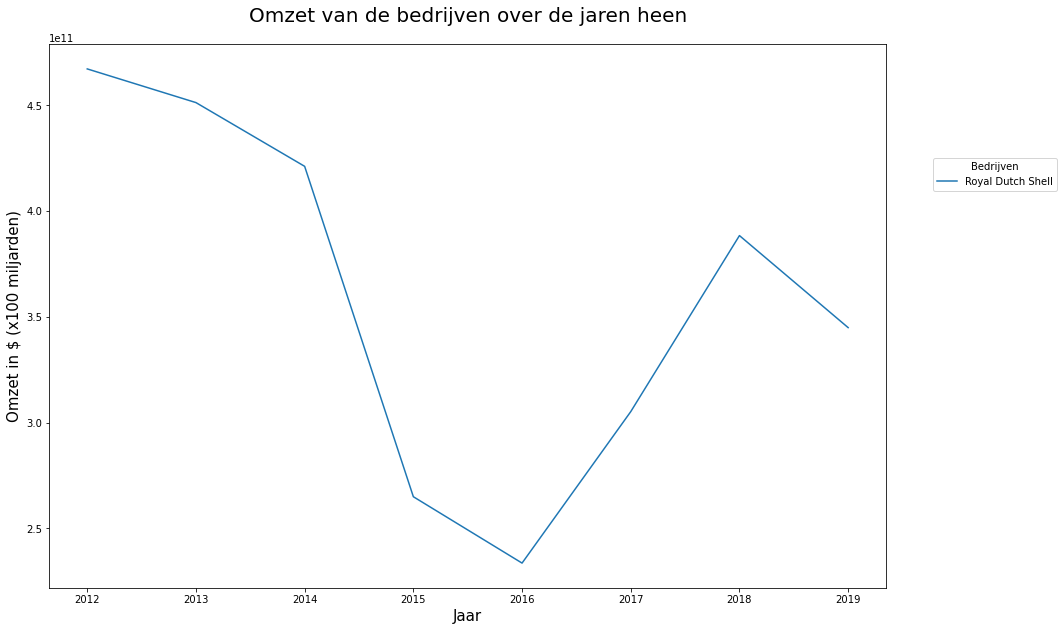

In [9]:
# Checkt welke boxes zijn aangevinkt
selected_data = []
for i in range(0, len(checkboxes)):
    if checkboxes[i].value == True:
        selected_data = selected_data + [checkboxes[i].description]

stip = 0
plt.figure(figsize=(15,10))

# Zet de data in een plot
for bedrijf in selected_data:
    df = omzet_df.loc[omzet_df['bedrijf'] == bedrijf].sort_values(by=['jaar van omzet'])
    xpoints = list(df['jaar van omzet'])
    ypoints = list(df['omzet'])
    if len(xpoints) <= 1:
        plt.plot(xpoints, ypoints, 'o', label = bedrijf)
        if stip == 0:
            print('De stip betekent dat het bedrijf maar 1 jaar aan omzet data had, helaas :(')
            stip +=1
    else:
        plt.plot(xpoints, ypoints, label = bedrijf)

# Aanpassen van de assen
if 'Royal Dutch Shell' in selected_data:
    plt.ylabel('Omzet in $ (x100 miljarden)', size=15)
else:
    plt.ylabel('Omzet in $ (x10 miljard)', size=15)

# Layout van de plot
plt.xlabel('Jaar', size=15)
plt.title('Omzet van de bedrijven over de jaren heen', size=20, y=1.03)
plt.legend(title='Bedrijven', bbox_to_anchor=(1.05, 0.8), loc='upper left')
plt.show()

## 5. Hoeveelheid volgers op sociale media <a class="anchor" id="5_Sociale_Media"></a>

Steeds meer bedrijven zetten sociale media in om hun bereik te vergroten. Het is een belangrijk onderdeel van de online-marketing afdeling van sommige bedrijven. Voorbeelden van sociale media die gebruikt kunnen worden zijn: Instagram, Facebook en LinkedIn. In deze plot focussen we ons op Twitter.

Alle bedrijven waarvan de sociale media volgers van Twitter op wikidata beschikbaar waren, zijn hieronder geplot. Onderaan het bedrijf met de meeste volgers en bovenaan het bedrijf met de minste volgers. 

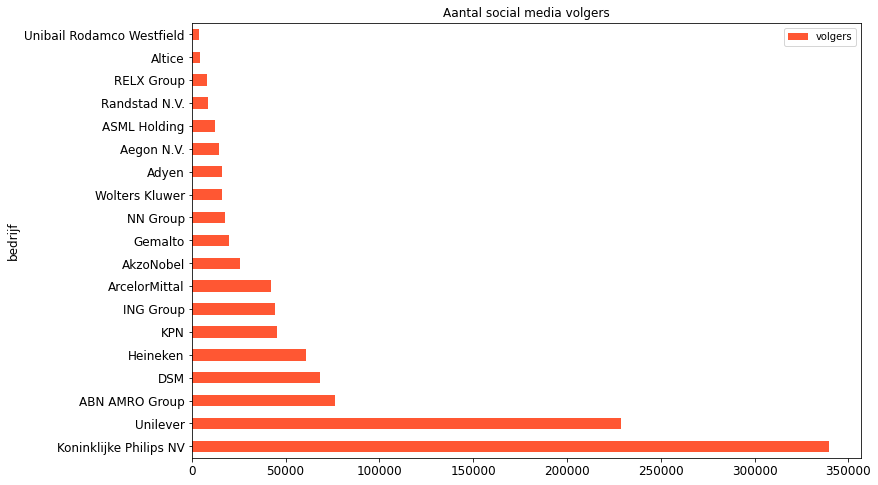

In [10]:
# Plot van de hoeveelheid volgers de bedrijven hebben op sociale media,
# bedrijven zonder sociale media/ volgers zijn eruit gehaald

volgers_df = bedrijven_df[['bedrijf', 'volgers']].dropna().drop_duplicates()
volgers_df.sort_values(by=['volgers'], ascending=False).plot(kind='barh', x='bedrijf',y='volgers', figsize=(12,8), title='Aantal social media volgers', fontsize=12, color='#FF5733')

## 6. Reflectie <a class="anchor" id="6_Reflectie"></a>

Met de keuze van zo ongelofelijk veel leuke onderwerpen was de AEX geen voor de hand liggende optie. De keuze om de AEX te gebruiken was voornamelijk berust op het feit dat de bedrijven in de AEX veel data bevatten. Zo hadden wij meer keuze tot visualisatie met de bedrijven die onderdeel waren van de AEX. In deze blogpost wilden wij de lezer informeren over deze bedrijven. Hoe de bedrijven zich verhouden tegenover elkaar op basis van de gevonden data. Uitendelijk zijn wij als groep erg tevreden over de gemaakte blogpost. Het toewerken naar een prachtige visualisatie zorgde dan ook voor de nodige motivatie binnen de groep. Wij hopen dat de lezer een stukje wijzer is geworden over de bedrijven die onderdeel zijn van de AEX en dat onze visualitsaties belangrijke data duidelijk in kaart bracht.